In [1]:
%pylab inline
import pandas
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib


In [2]:
##Load CSV file into memory

In [3]:
data = pandas.read_csv('Desktop/uber-raw-data-jun14.csv')

In [4]:
data.head()


,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [5]:
##Convert datetime format and add some useful columns

In [6]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)
data.head()


,Date/Time,Lat,Lon,Base
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512


In [7]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [8]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
663839,2014-06-30 22:40:00,40.7332,-73.9872,B02764,30
663840,2014-06-30 23:12:00,40.7905,-73.9796,B02764,30
663841,2014-06-30 23:13:00,40.7640,-73.9887,B02764,30
663842,2014-06-30 23:15:00,40.7262,-73.9944,B02764,30
663843,2014-06-30 23:35:00,40.7404,-73.9848,B02764,30


In [9]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()


,Date/Time,Lat,Lon,Base,dom,weekday,hour
663839,2014-06-30 22:40:00,40.7332,-73.9872,B02764,30,0,22
663840,2014-06-30 23:12:00,40.7905,-73.9796,B02764,30,0,23
663841,2014-06-30 23:13:00,40.7640,-73.9887,B02764,30,0,23
663842,2014-06-30 23:15:00,40.7262,-73.9944,B02764,30,0,23
663843,2014-06-30 23:35:00,40.7404,-73.9848,B02764,30,0,23


In [11]:
def get_month(mnt):
    return mnt.month

data['month'] = data['Date/Time'].map(get_month)
data.head()



,Date/Time,Lat,Lon,Base,dom,weekday,hour,month
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512,1,6,0,6
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512,1,6,0,6
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512,1,6,0,6
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512,1,6,0,6
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512,1,6,0,6


In [12]:
by_date = data.groupby('month').apply(count_rows)
by_date

NameError: name 'count_rows' is not defined

In [13]:
#Analysis
##Analyse the dom

Text(0.5,1,'Frequency by DoM - uber - may 2014')

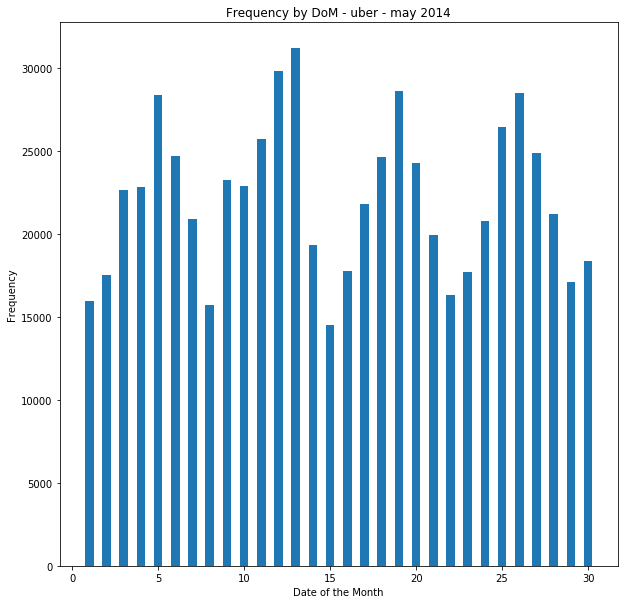

In [14]:
figure(figsize=(10,10))
hist(data.dom, bins=30, rwidth=0.5, range=(0.5, 30.5))

xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency by DoM - uber - may 2014')

In [15]:
#for k, rows in data.groupby('dom'):
#    print((k, len(rows)))
 
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date


dom
1     15967
2     17503
3     22674
4     22831
5     28371
6     24683
7     20889
8     15749
9     23244
10    22874
11    25716
12    29844
13    31207
14    19327
15    14511
16    17778
17    21807
18    24647
19    28594
20    24271
21    19940
22    16322
23    17735
24    20779
25    26460
26    28516
27    24895
28    21208
29    17107
30    18395
dtype: int64

<BarContainer object of 30 artists>

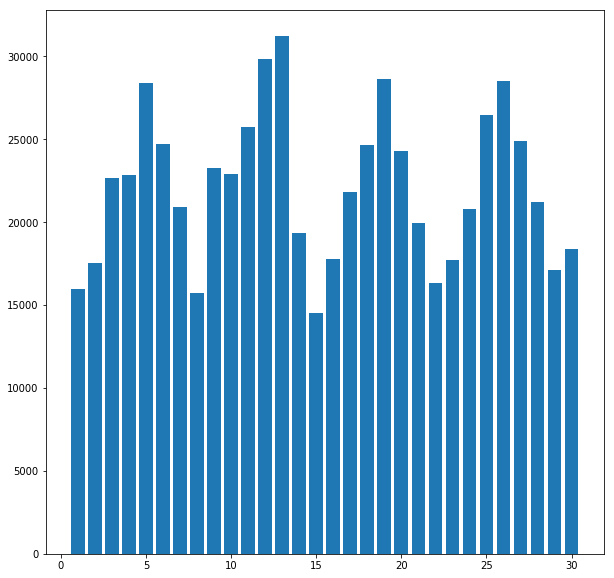

In [16]:
figure(figsize=(10,10))
bar(range(1, 31),by_date)

In [17]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
15    14511
8     15749
1     15967
22    16322
29    17107
2     17503
23    17735
16    17778
30    18395
14    19327
21    19940
24    20779
7     20889
28    21208
17    21807
3     22674
4     22831
10    22874
9     23244
20    24271
18    24647
6     24683
27    24895
11    25716
25    26460
5     28371
26    28516
19    28594
12    29844
13    31207
dtype: int64

''

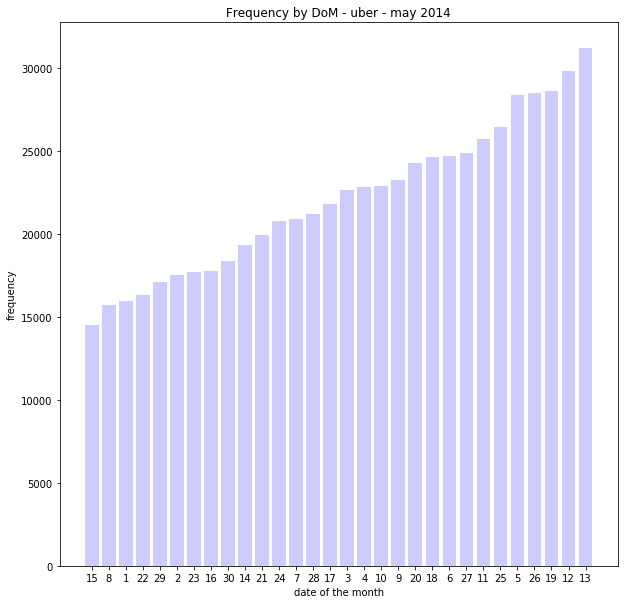

In [18]:
figure(figsize=(10,10))
bar(range(1, 31), by_date_sorted, alpha=.2, color='b')
xticks(range(1,31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - may 2014')
;


In [19]:
##Analyse the hour

(array([ 9167.,  6189.,  6937.,  7701., 11955., 22030., 30834., 29771.,
        24298., 23584., 24155., 25233., 28937., 34428., 41586., 48162.,
        50452., 45013., 38203., 40108., 40791., 35614., 24182.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

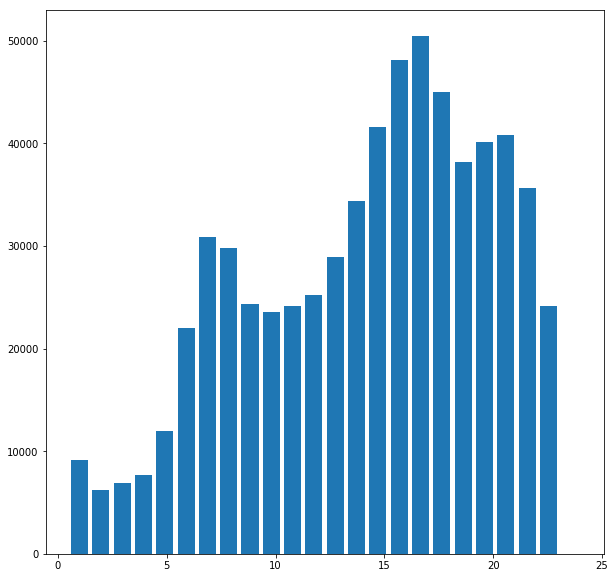

In [20]:
figure(figsize=(10,10))
hist(data.hour, bins=24, range=(.5, 24), rwidth=0.8)

In [21]:
##Analysis using the seaborn lib

In [22]:
##Analyze the hours


In [23]:
def thousands_comma(x, pos):
    """
    Args are the value and tick position. 
    Returns number with thousands comma and no decimals.
    """
    return '{:,.0f}'.format(x) #this is the new syntax for formatting

def thousands_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of thousands with one decimal, and K in lieu of 3 zeros.
    """
    return '{:.0f}{}'.format(x * 1e-3, 'K') #old syntax: '%1.0fK' % (x * 1e-3)

def millions_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of millions with one decimal, and M in lieu of 6 zeros.
    """
    return '{:.1f}{}'.format(x * 1e-6, 'M')

In [24]:
formatter = FuncFormatter(thousands_format)


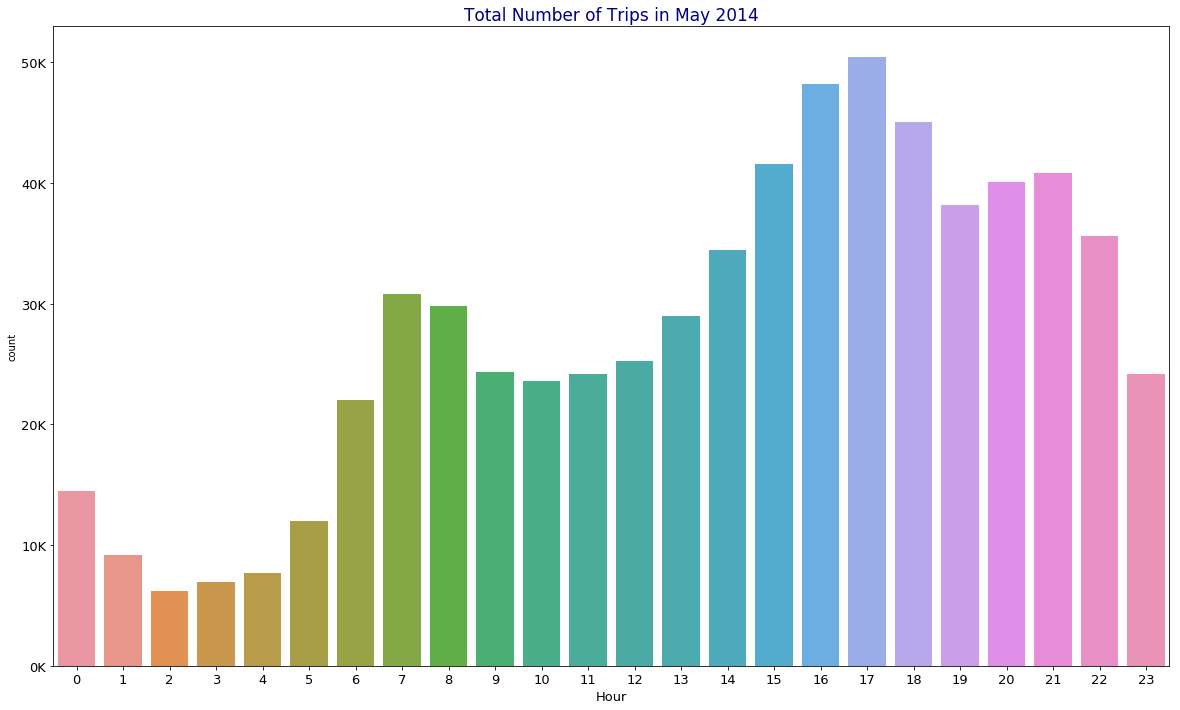

In [25]:
figure(figsize=(20,40))
plt.subplot(3,1,1)
ax1 = sns.countplot(data.hour, order = range(24))
ax1.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips in May 2014', fontsize=17, color='navy')
plt.xlabel('Hour', fontsize=13)

plt.show()

In [26]:
formatter = FuncFormatter(thousands_format)


In [27]:
##Analyzing the weekday 

In [28]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_labels = ['Apr','May','Jun','july','Aug','Sept']

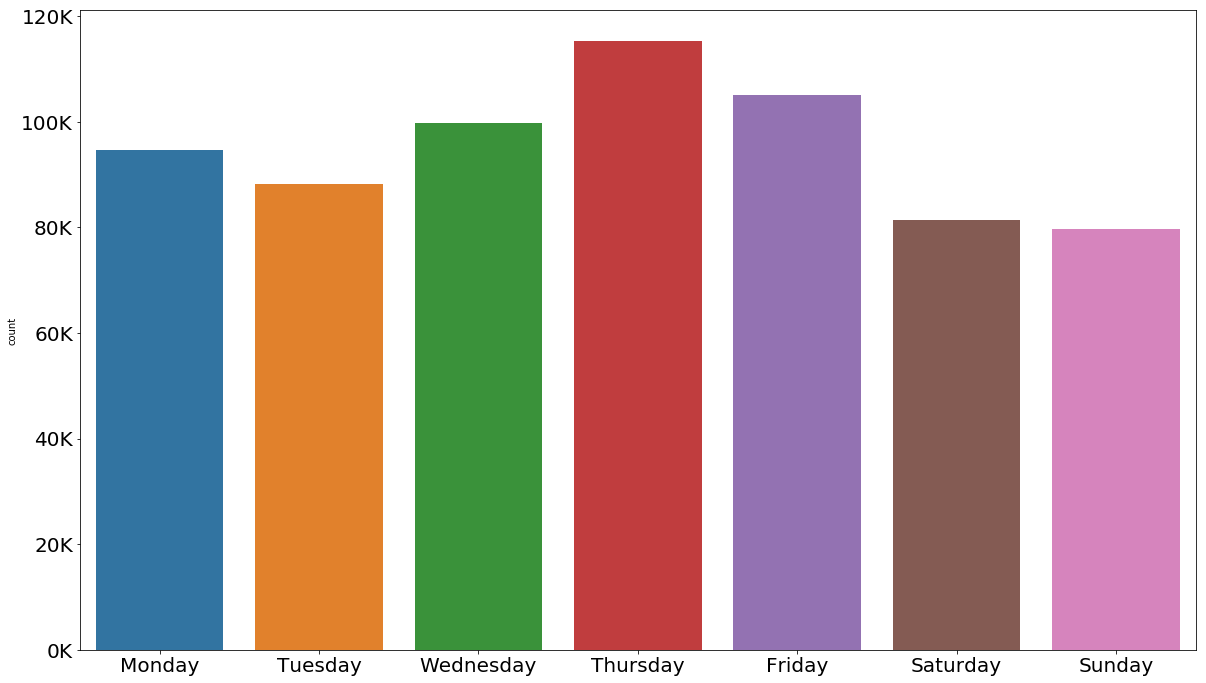

In [29]:
figure(figsize=(20,40))
plt.subplot(3,1,2)
ax2 = sns.countplot(data.weekday, order = range(7))
ax2.set_xticklabels(weekday_labels)
ax2.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=20)
plt.xlabel('')

plt.show()

In [30]:
##Analyse as per month

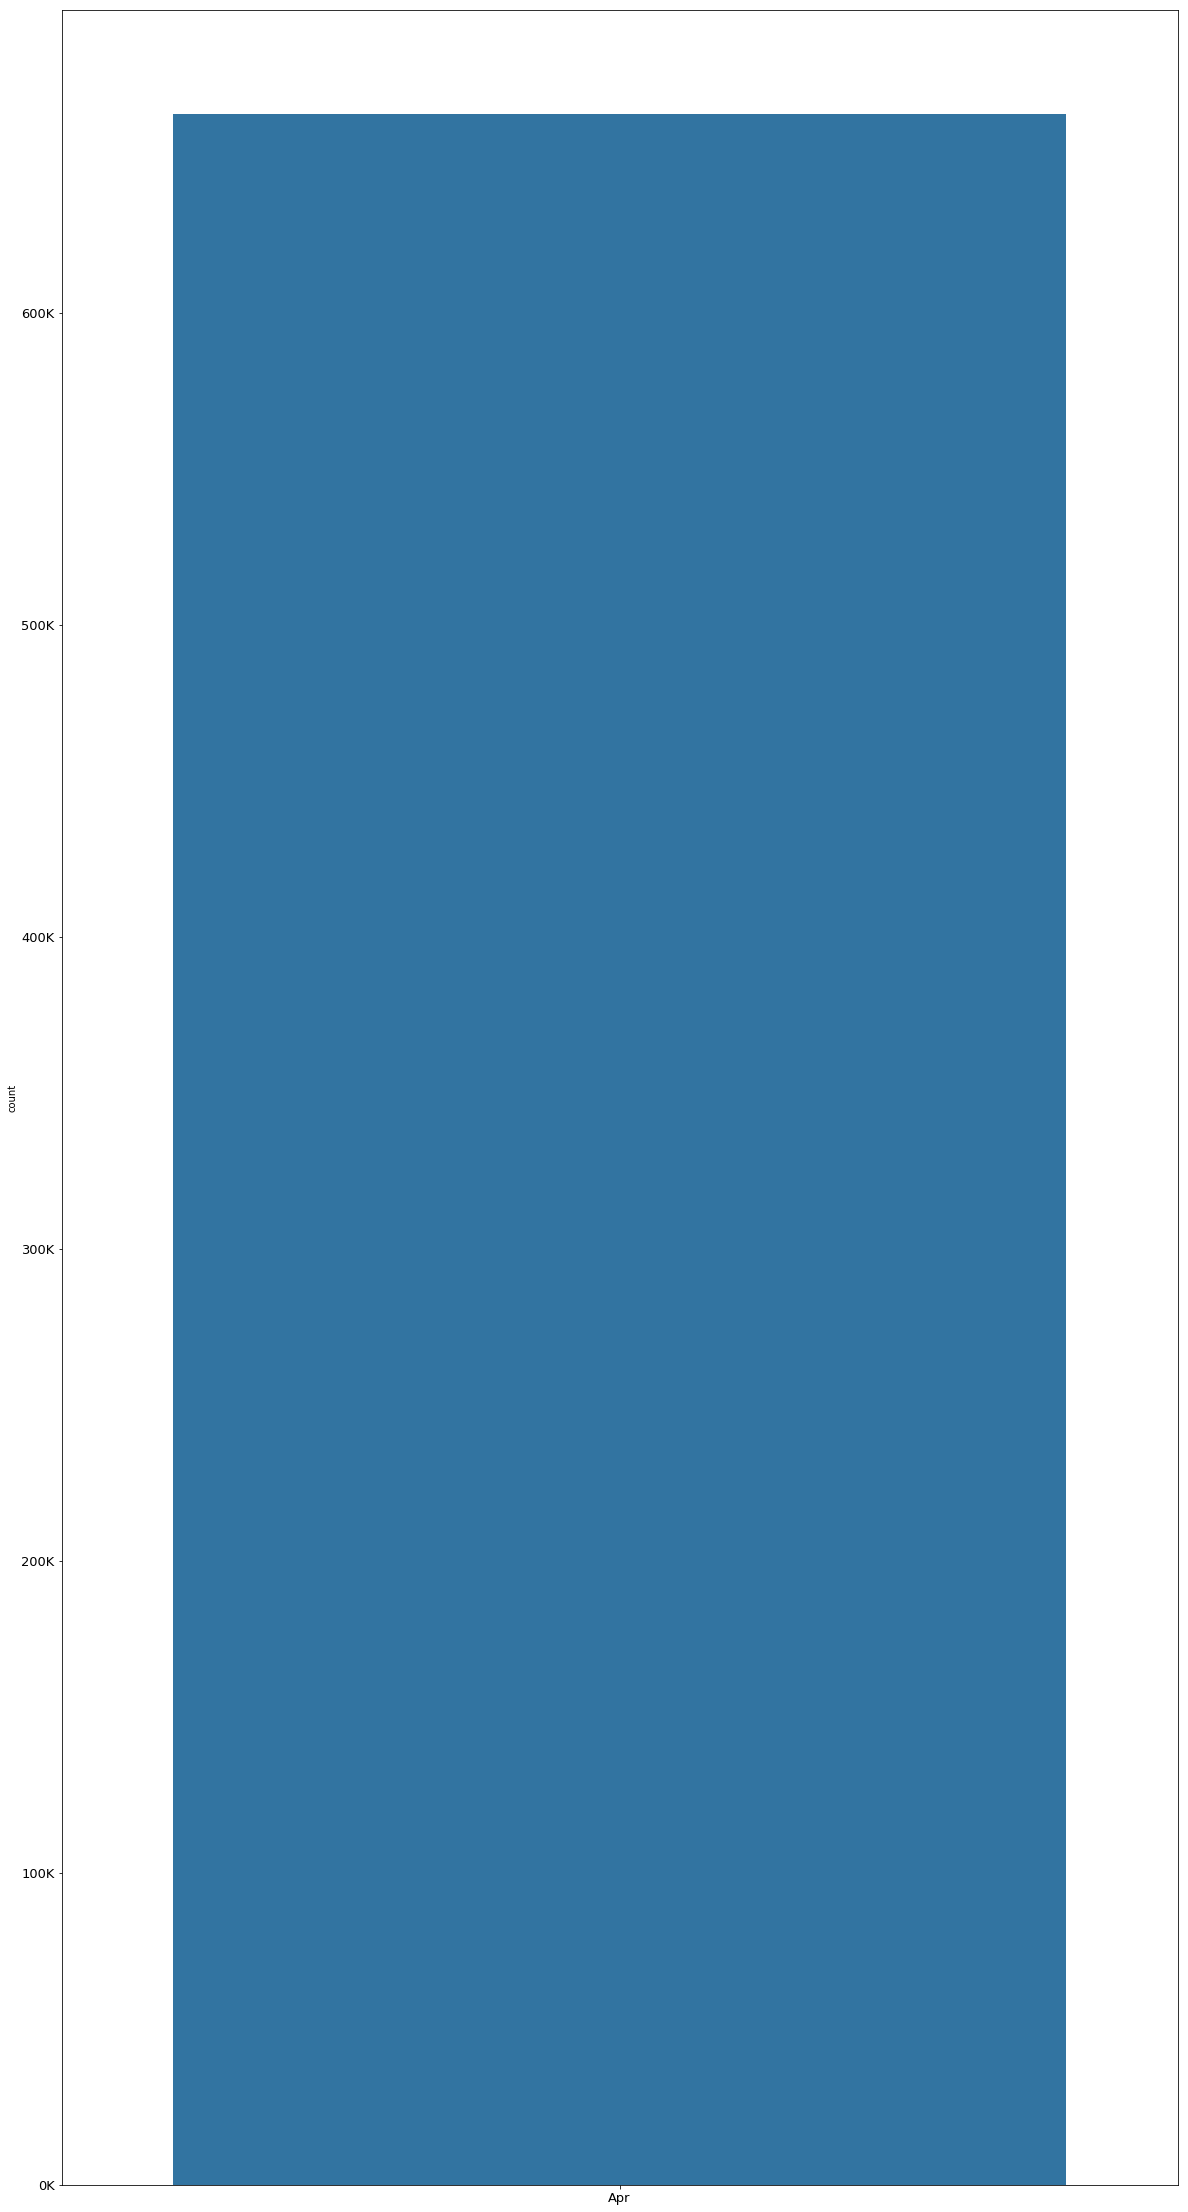

In [31]:
figure(figsize=(20,40))
#same as the line plot but with less granularity, perhaps easier to visualize the MOM growth
ax3 = sns.countplot(data.month)
ax3.set_xticklabels(month_labels)
ax3.yaxis.set_major_formatter(formatter)

#plt.text(0, 3100000, 'Consistent growth in the number of trips from month to month!', color='navy', size=15)
plt.tick_params(labelsize=13)
plt.xlabel('')

#fig.subplots_adjust(hspace=.5)
plt.show()

In [32]:
##Cross analysis (hour, dow)

In [33]:
figure(figsize=(30,30))
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

<Figure size 2160x2160 with 0 Axes>

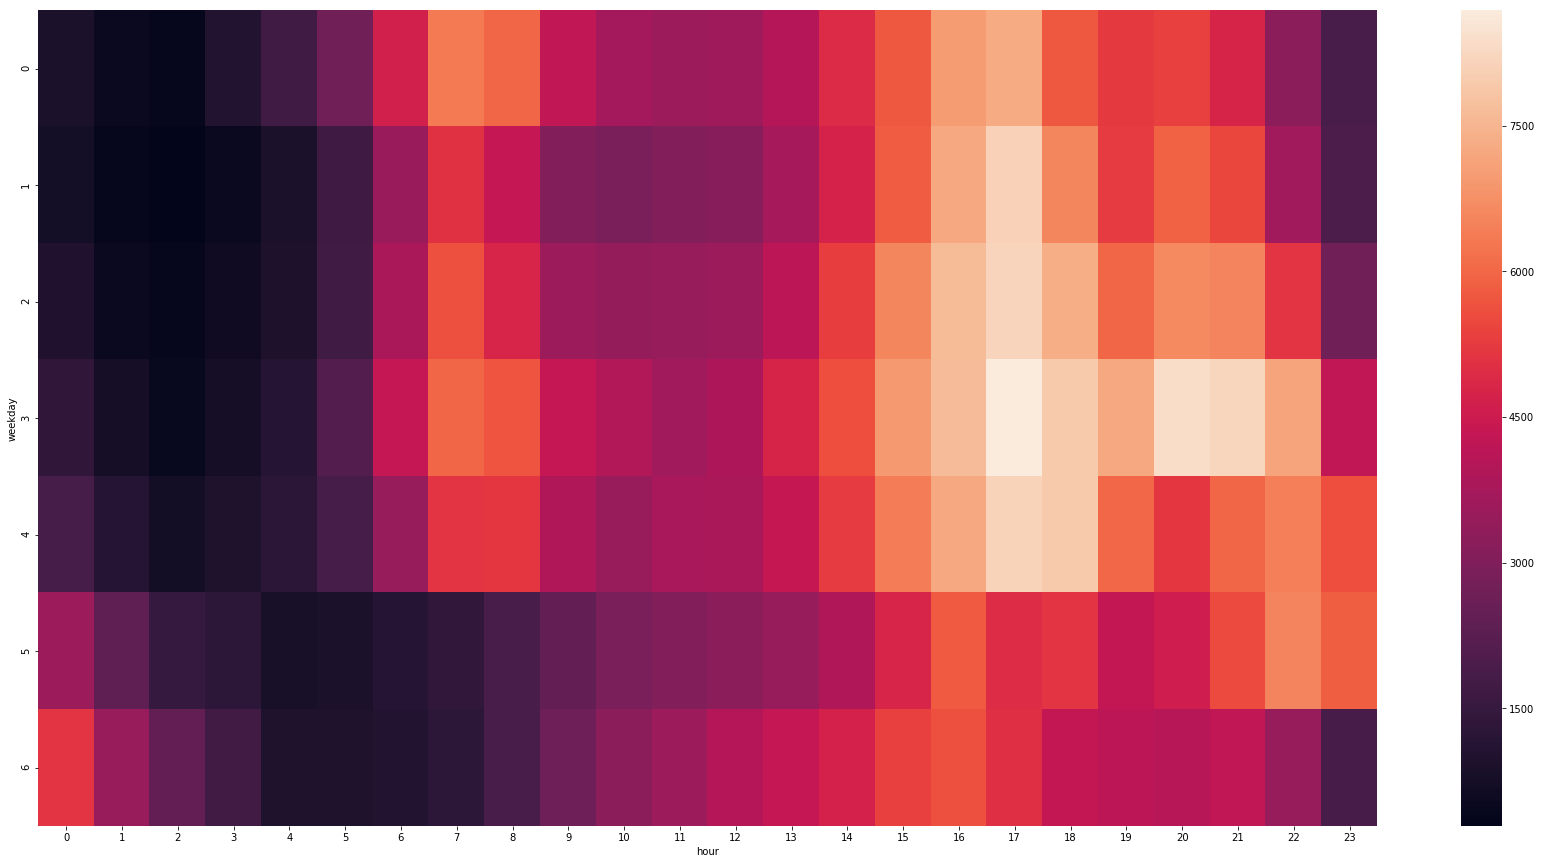

In [34]:
figure(figsize=(30,15))
sns.heatmap (by_cross)

In [35]:
##Analyse using Longitude and Latitude


''

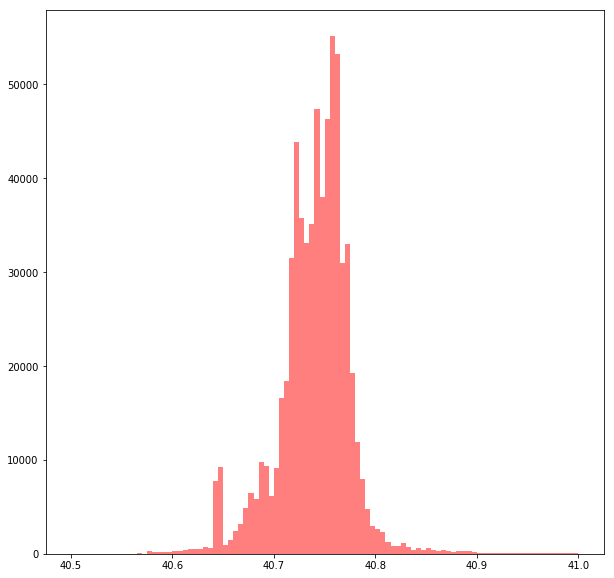

In [36]:
figure(figsize=(10,10))
hist(data['Lat'], bins=100, range = (40.5, 41), alpha=.5, color='r')
;

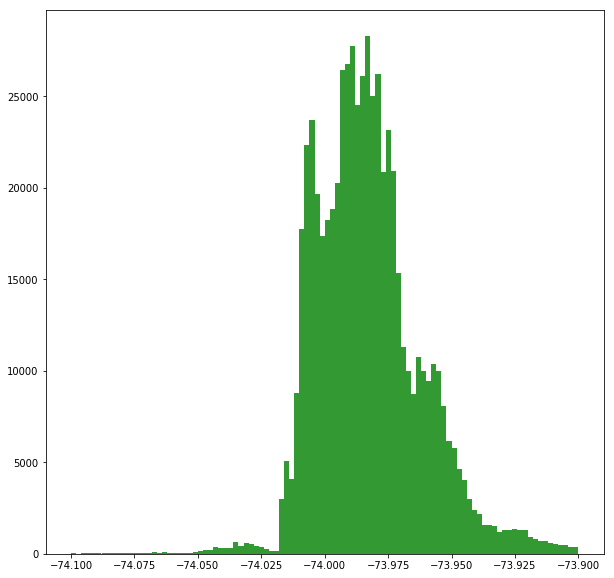

In [37]:
figure(figsize=(10,10))
hist(data['Lon'], bins=100, range = (-74.1, -73.9), alpha=.8, color='g');

''

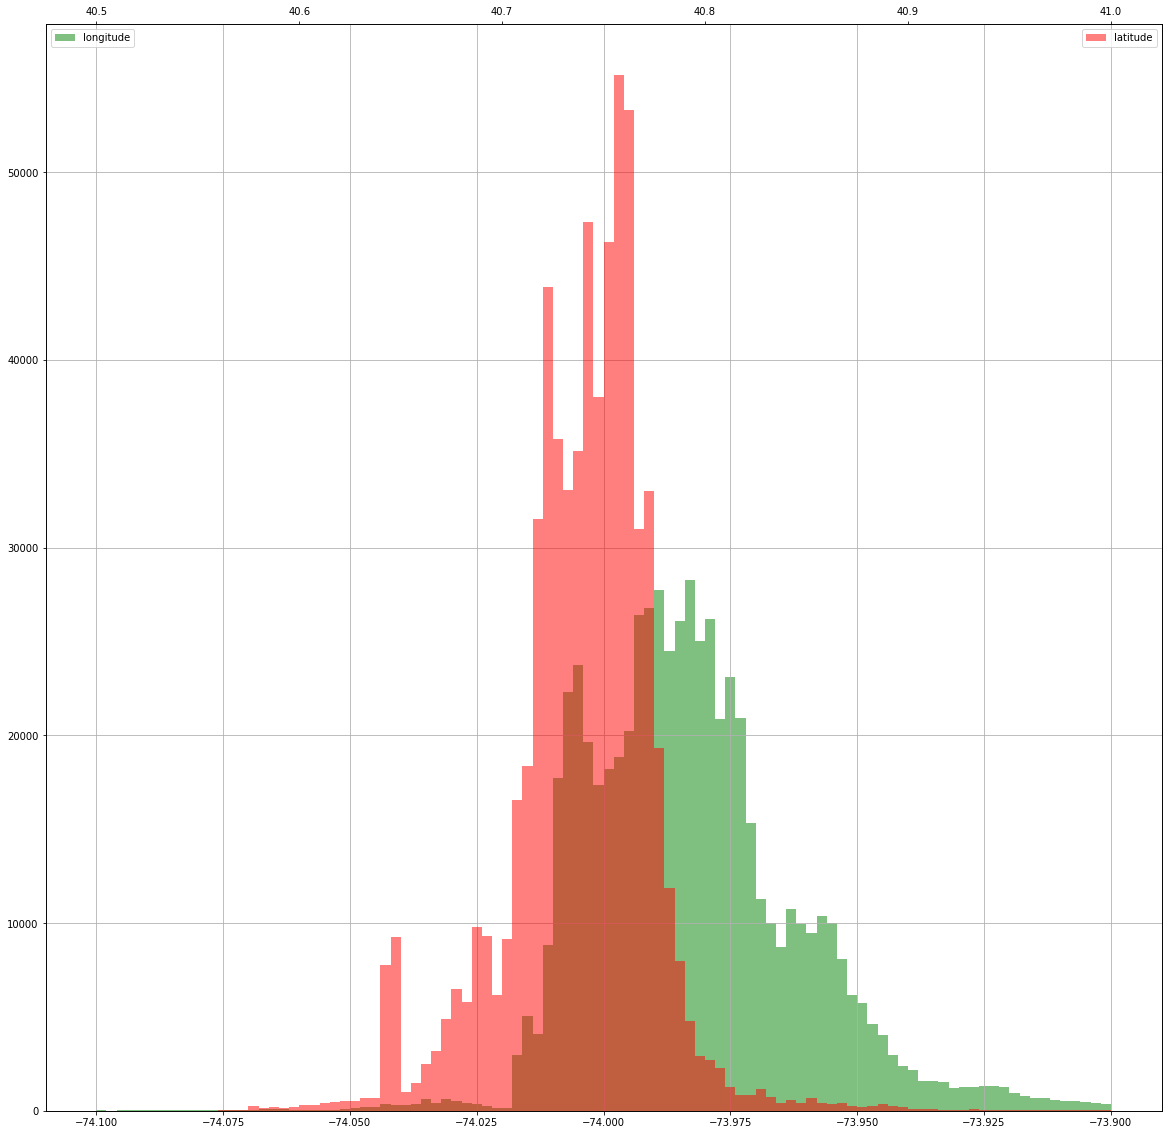

In [38]:
figure(figsize=(20,20))
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

(40.7, 41)

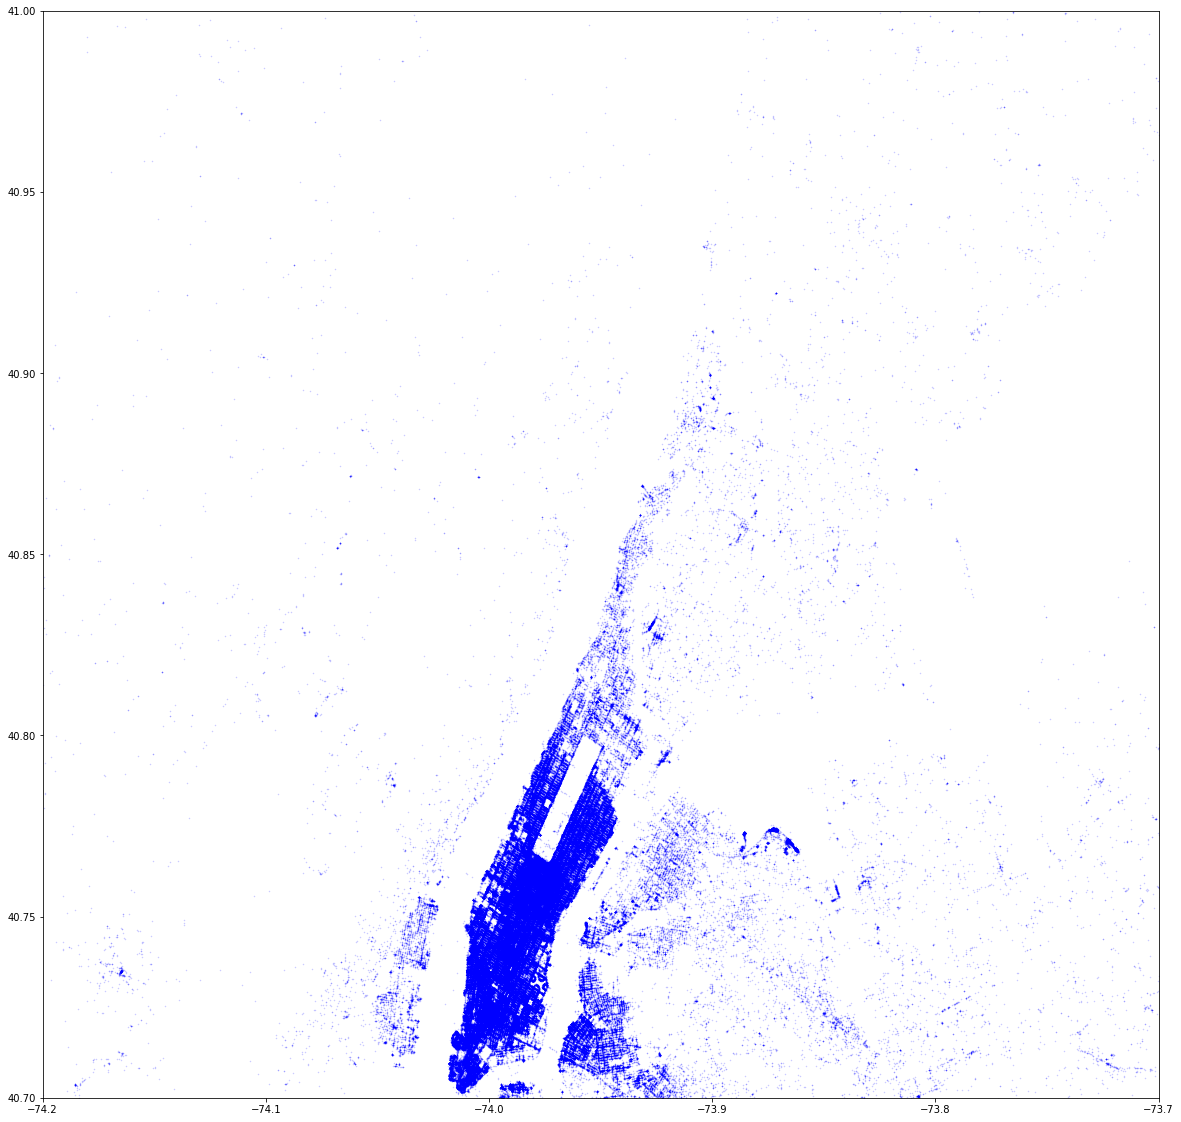

In [39]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.2,color='b')
xlim(-74.2, -73.7)
ylim(40.7, 41)


0         40.7690
1         40.7267
2         40.7316
3         40.7588
4         40.7594
5         40.7383
6         40.7223
7         40.7620
8         40.7524
9         40.7575
10        40.7256
11        40.7591
12        40.7271
13        40.6463
14        40.7564
15        40.7666
16        40.7580
17        40.7238
18        40.7531
19        40.7389
20        40.7619
21        40.7530
22        40.6561
23        40.7250
24        40.6950
25        40.9859
26        40.6879
27        40.6878
28        40.7234
29        40.7336
           ...   
564486    40.7342
564487    40.7412
564488    40.7633
564489    40.7549
564490    40.7210
564491    40.7025
564492    40.7568
564493    40.7446
564494    40.7013
564495    40.7213
564496    40.7587
564497    40.7325
564498    40.8152
564499    40.7643
564500    40.7650
564501    40.7436
564502    40.7313
564503    40.8007
564504    40.7603
564505    40.7419
564506    40.7316
564507    40.7267
564508    40.7788
564509    40.7420
564510    

C:\Users\shubh\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\shubh\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


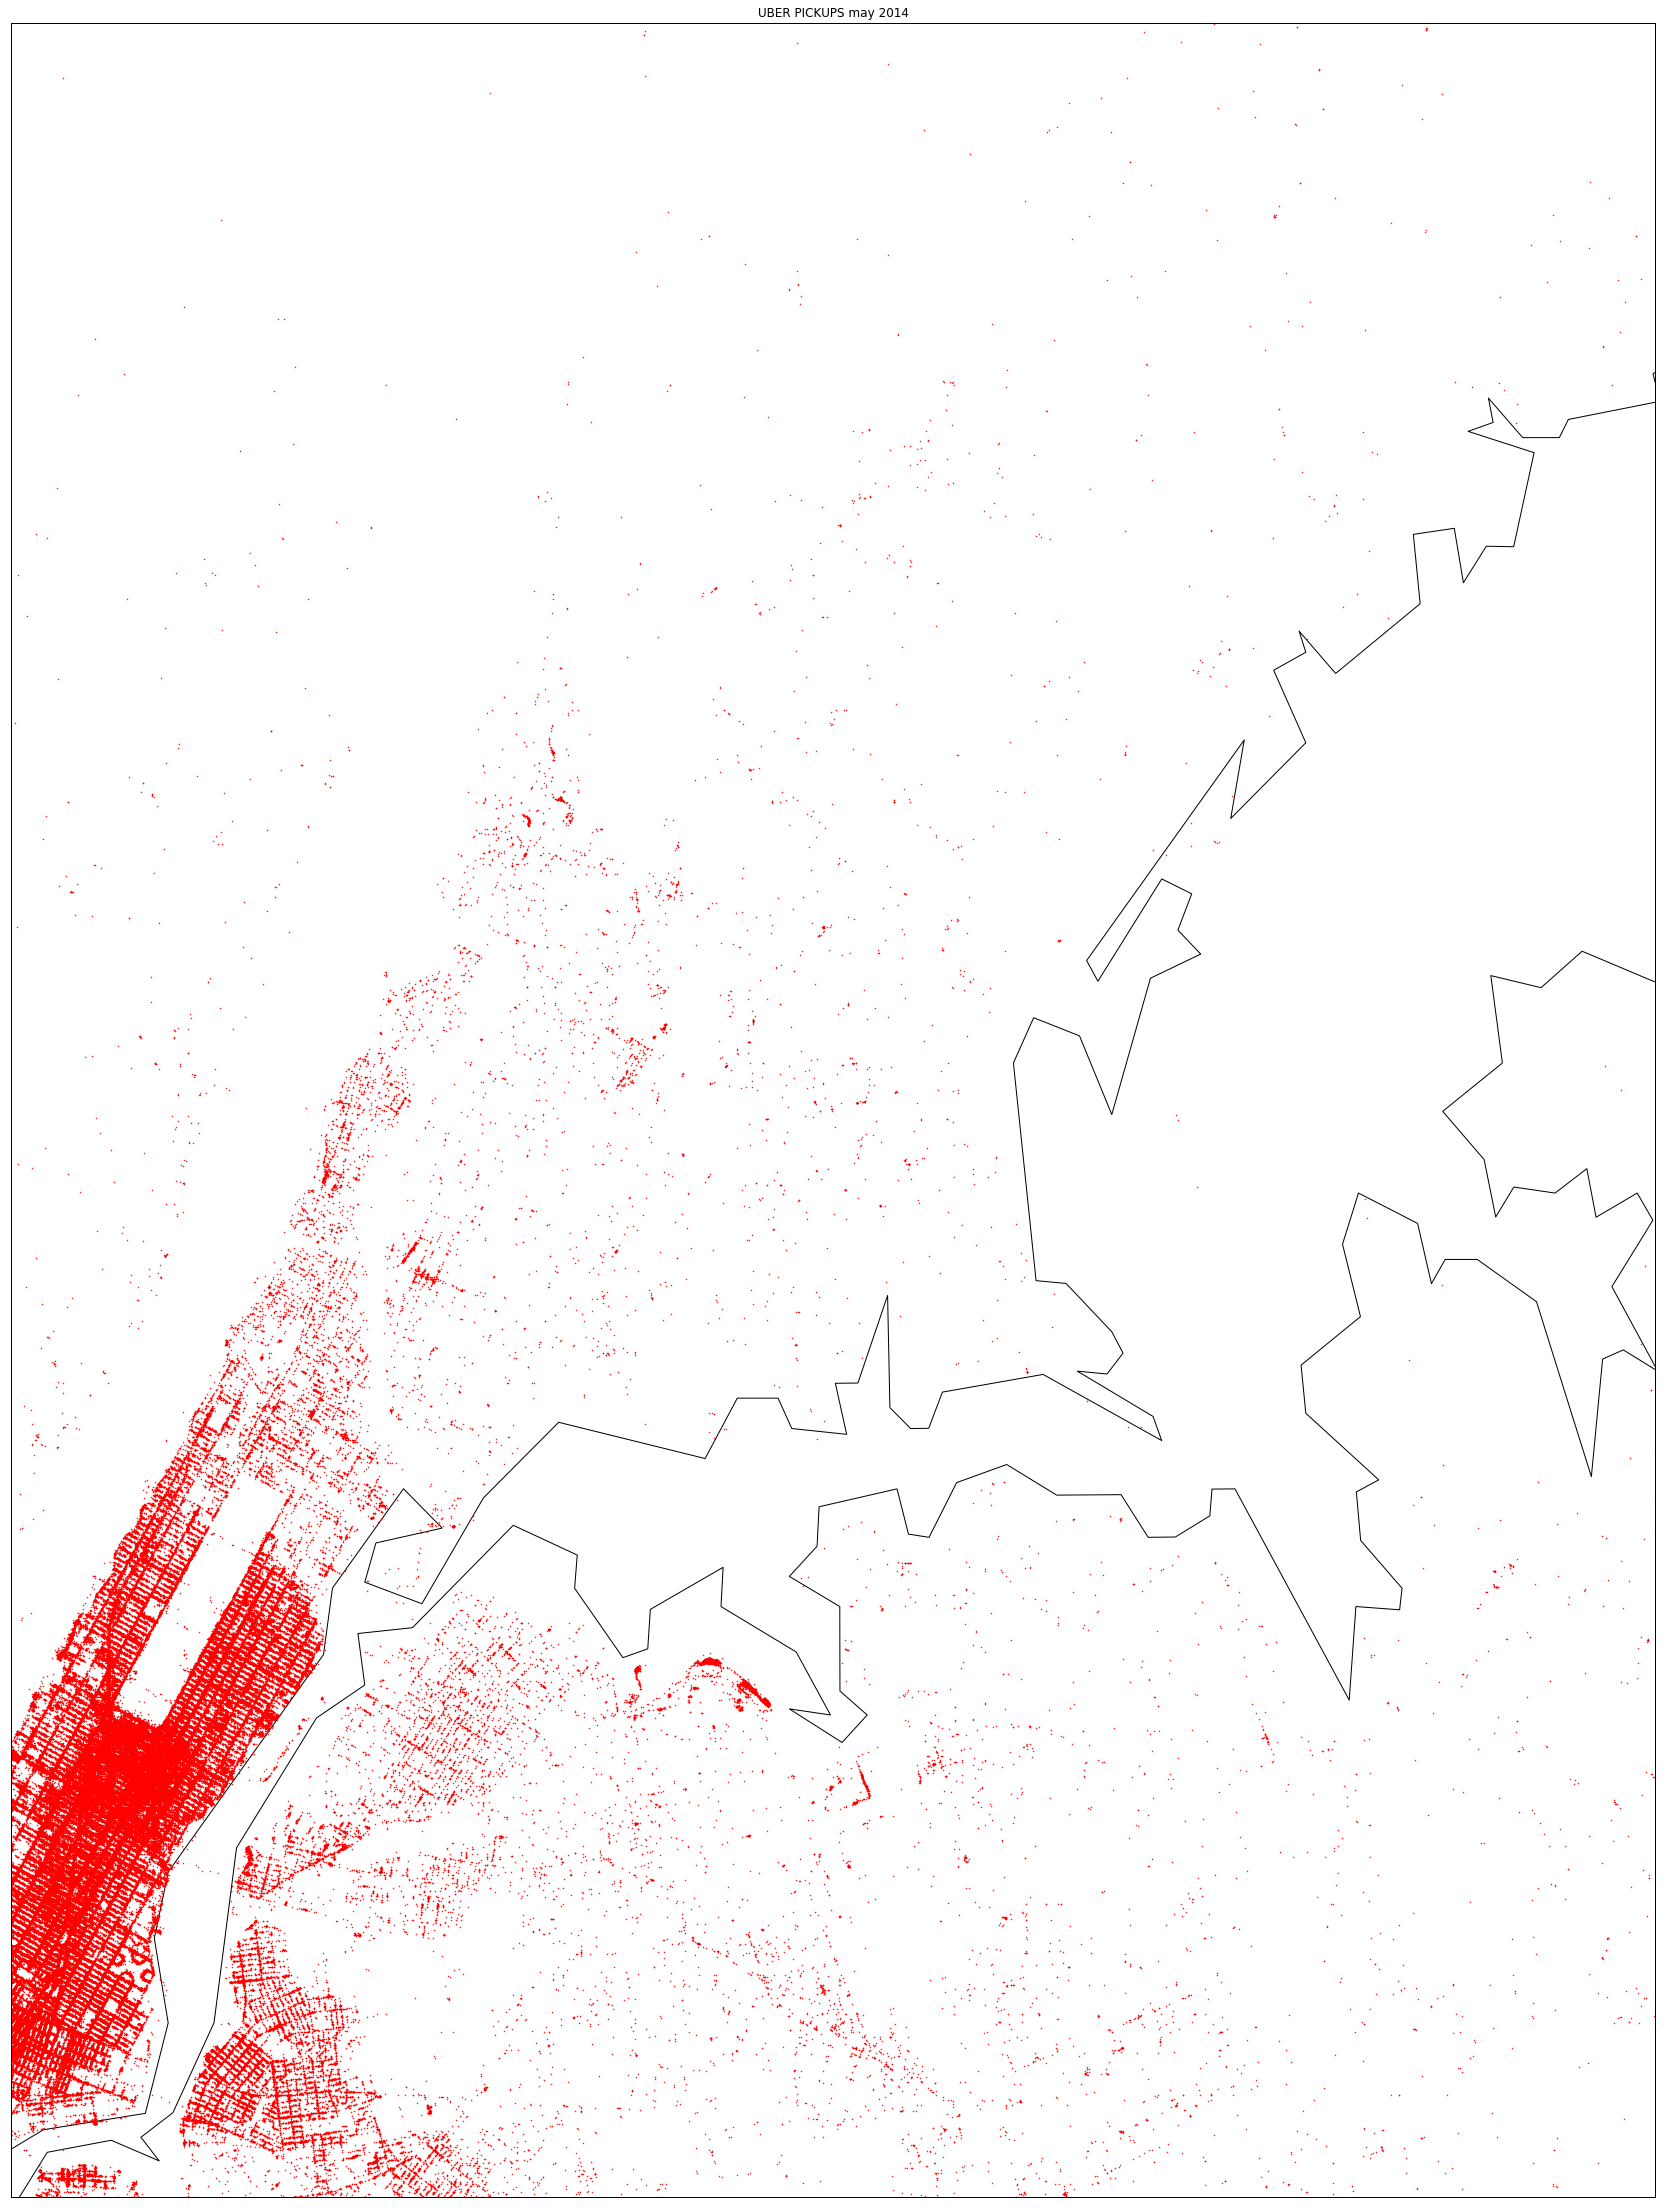

In [40]:
figure(figsize=(40,40))
data = pandas.read_csv('Desktop/uber-raw-data-apr14.csv', parse_dates=['Date/Time'])
print(data['Lat'])

my_map =  Basemap(projection='merc', lat_0 = 57, lon_0 = -130,
    resolution = 'h', area_thresh = 1000, llcrnrlon=-74.,llcrnrlat=40.7,urcrnrlon=-73.7,urcrnrlat=41,)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white')
my_map.drawmapboundary()
 

x, y = my_map(data['Lon'].values, data['Lat'].values)

# draw a red dot at cities coordinates
plt.plot(x, y, 'ro', markersize=1, marker='.')
plt.title('UBER PICKUPS may 2014')
plt.show()


0         40.7690
1         40.7267
2         40.7316
3         40.7588
4         40.7594
5         40.7383
6         40.7223
7         40.7620
8         40.7524
9         40.7575
10        40.7256
11        40.7591
12        40.7271
13        40.6463
14        40.7564
15        40.7666
16        40.7580
17        40.7238
18        40.7531
19        40.7389
20        40.7619
21        40.7530
22        40.6561
23        40.7250
24        40.6950
25        40.9859
26        40.6879
27        40.6878
28        40.7234
29        40.7336
           ...   
564486    40.7342
564487    40.7412
564488    40.7633
564489    40.7549
564490    40.7210
564491    40.7025
564492    40.7568
564493    40.7446
564494    40.7013
564495    40.7213
564496    40.7587
564497    40.7325
564498    40.8152
564499    40.7643
564500    40.7650
564501    40.7436
564502    40.7313
564503    40.8007
564504    40.7603
564505    40.7419
564506    40.7316
564507    40.7267
564508    40.7788
564509    40.7420
564510    

C:\Users\shubh\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\shubh\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


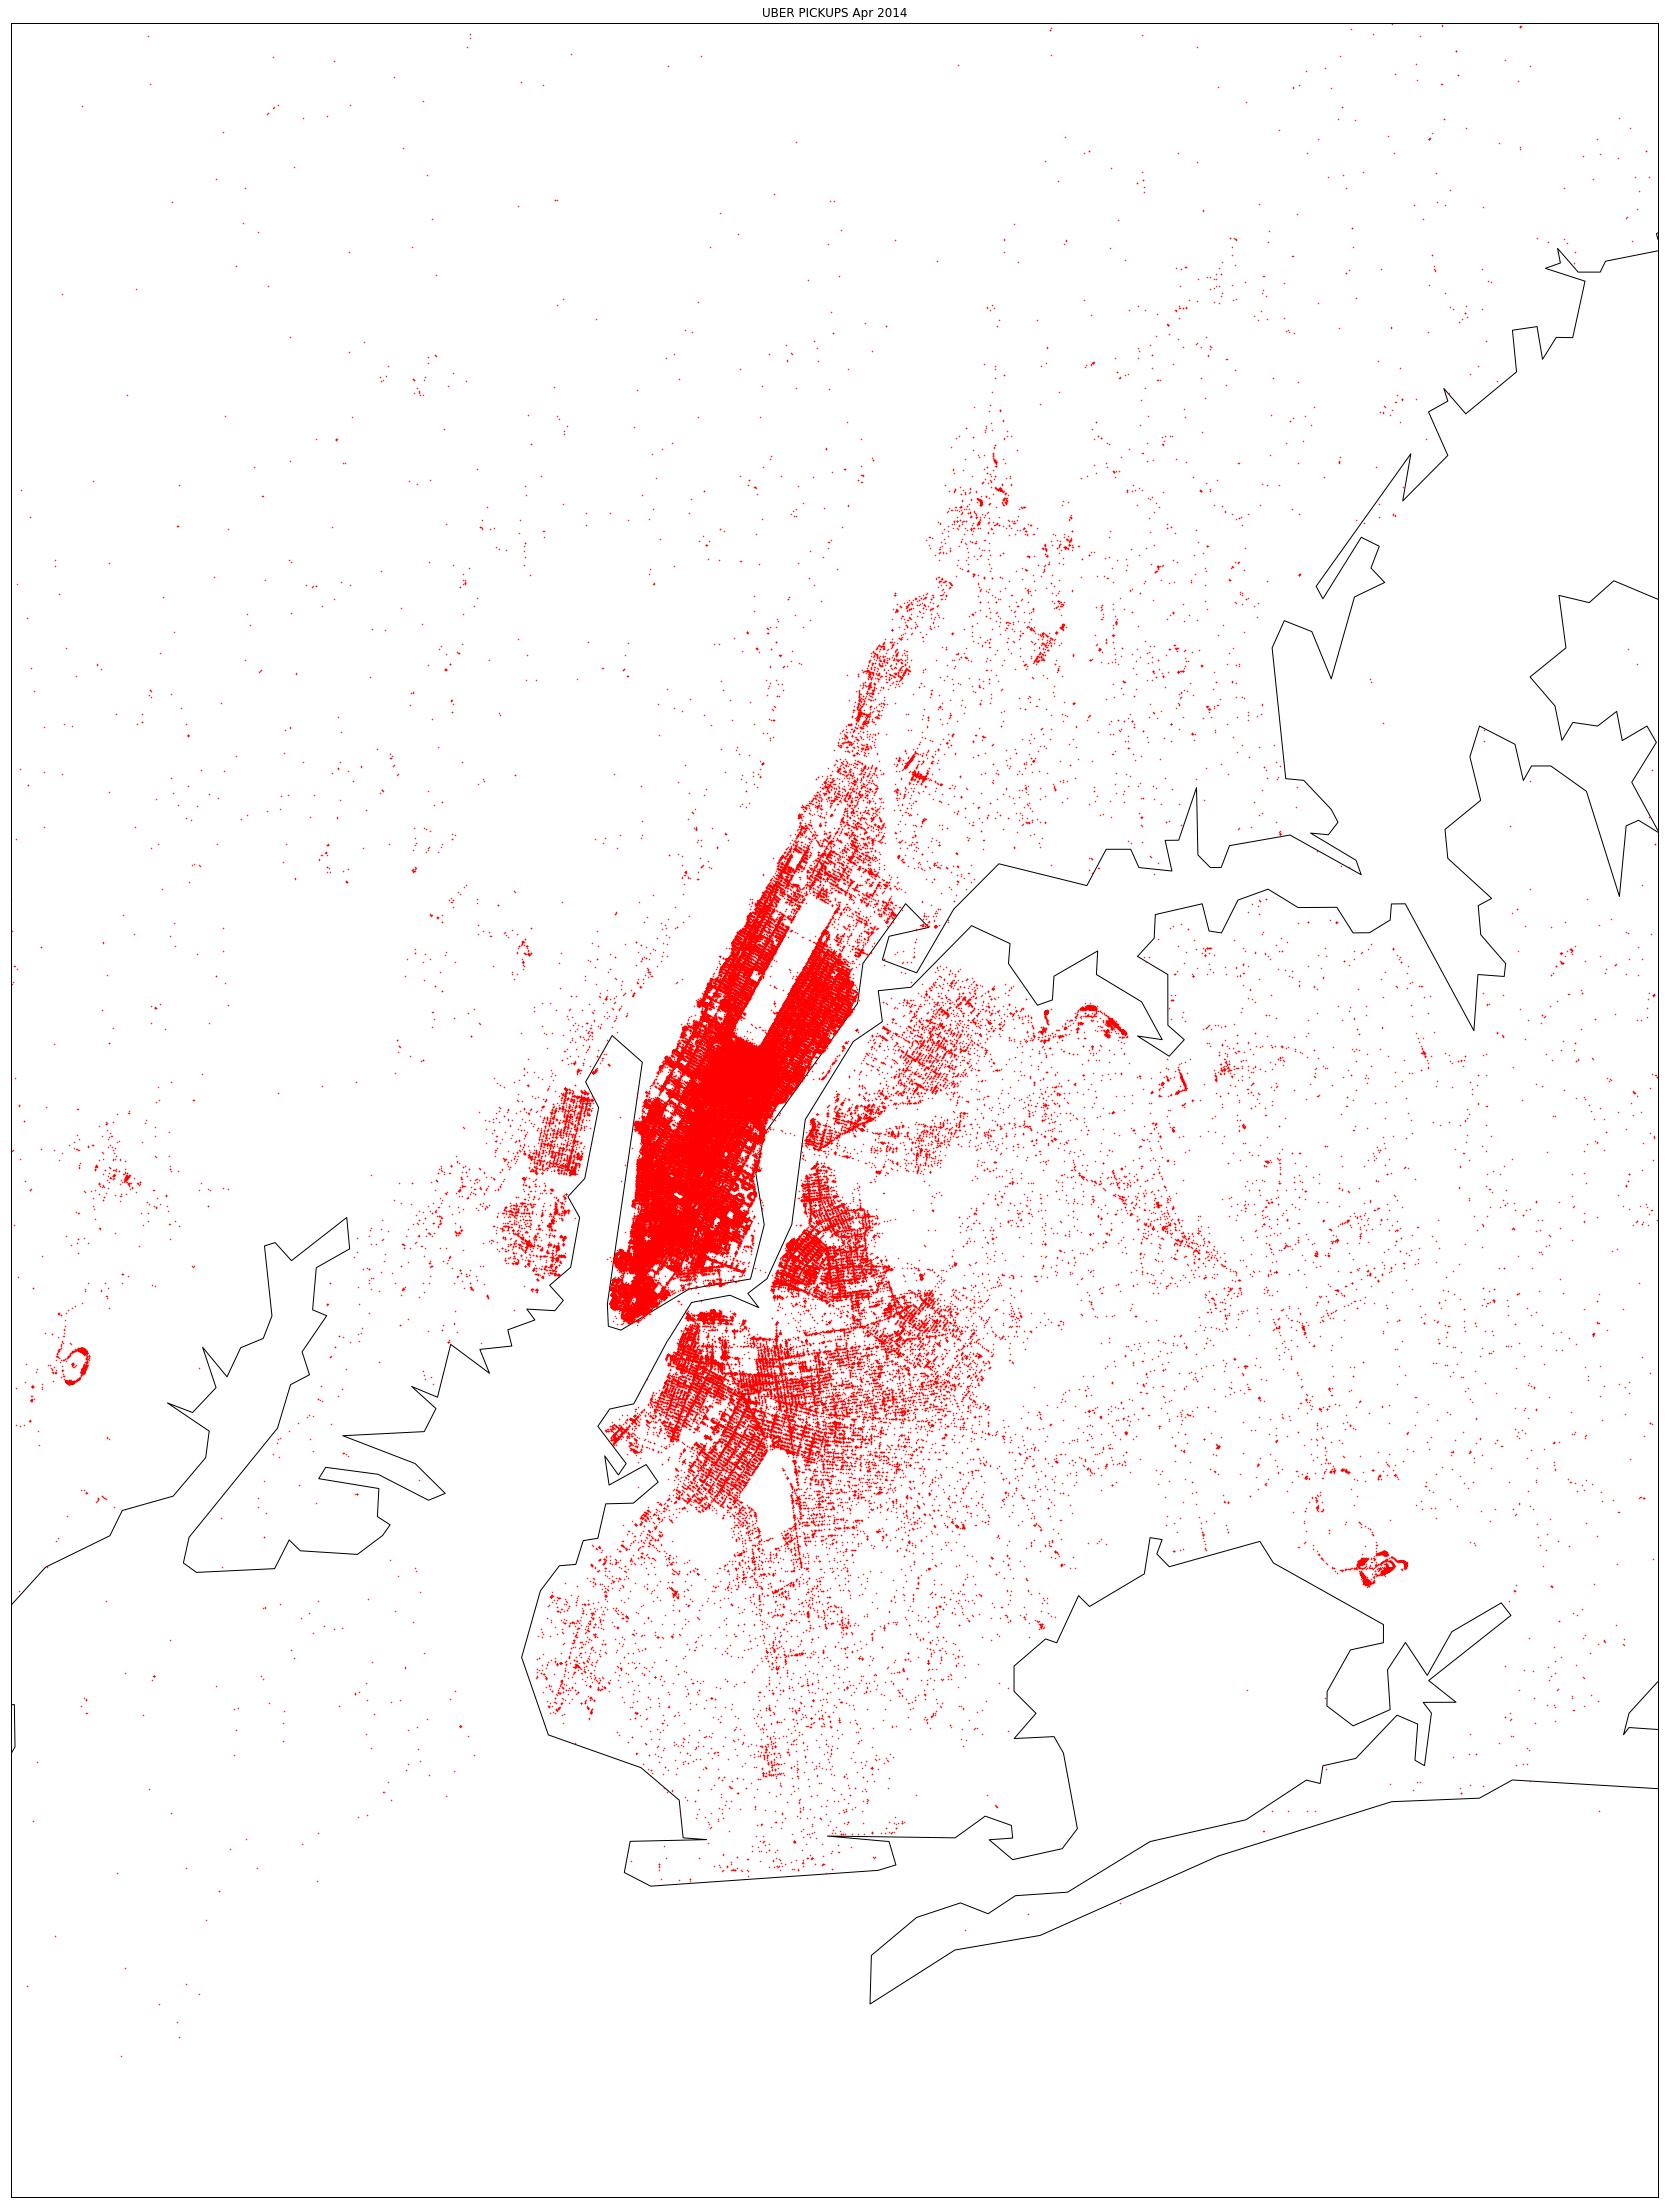

In [58]:
figure(figsize=(40,40))
data = pandas.read_csv('Desktop/uber-raw-data-apr14.csv', parse_dates=['Date/Time'])
print(data['Lat'])

my_map =  Basemap(projection='merc', lat_0 = 57, lon_0 = -130,
    resolution = 'h', area_thresh = 1000, llcrnrlon=-74.2,llcrnrlat=40.5,urcrnrlon=-73.7,urcrnrlat=41.0,)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white')
my_map.drawmapboundary()
 

x, y = my_map(data['Lon'].values, data['Lat'].values)

# draw a red dot at cities coordinates
plt.plot(x, y, 'ro', markersize=1, marker='.')
plt.title('UBER PICKUPS Apr 2014')
plt.show()


(40.5, 41.1)

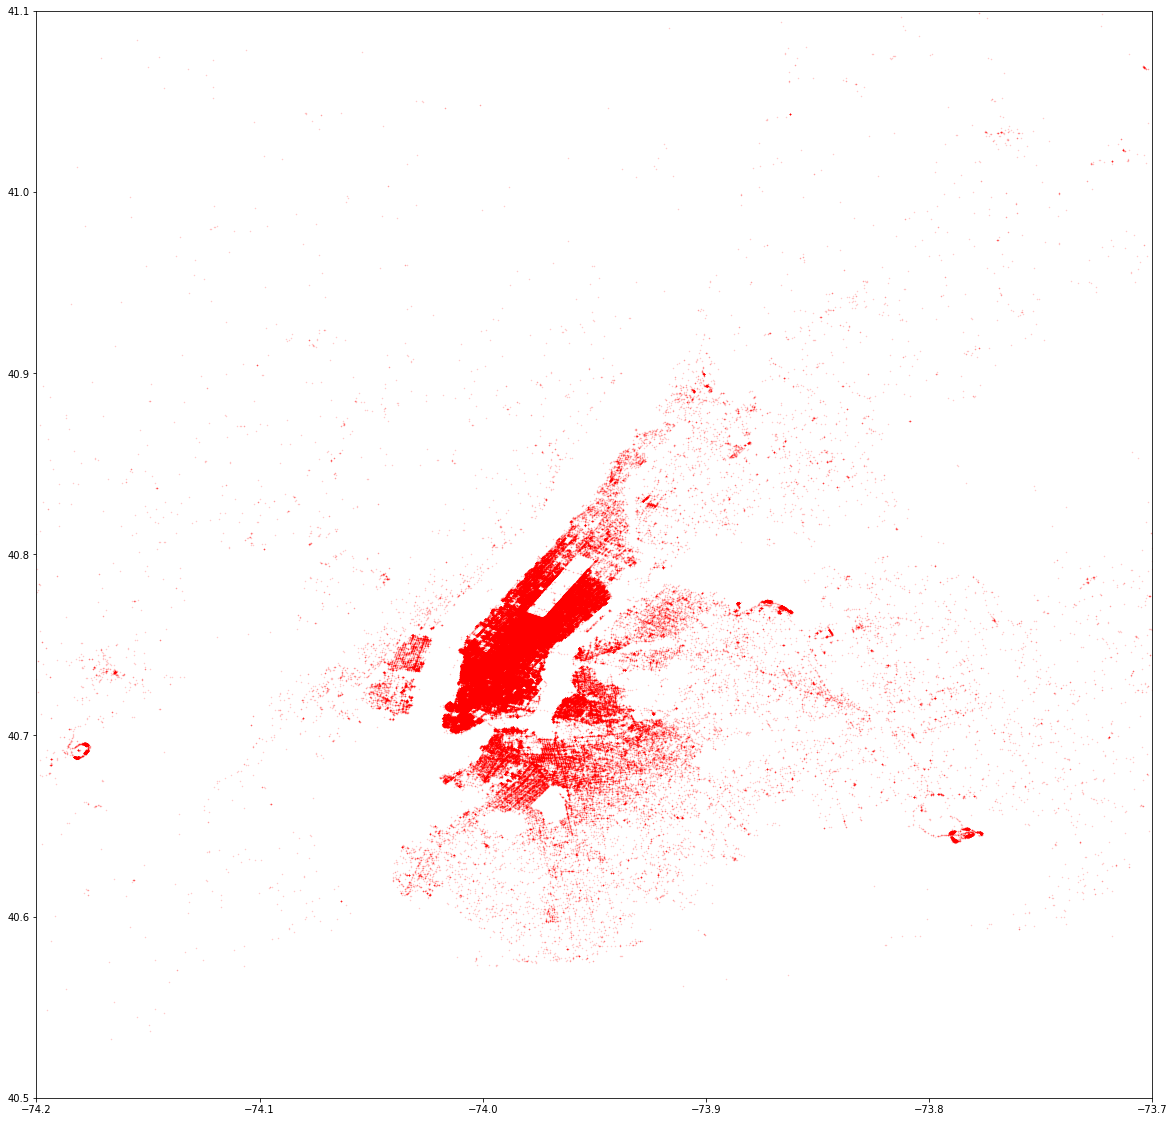

In [71]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.2,color='r')
xlim(-74.2, -73.7)
ylim(40.5, 41.1)
